# Titanic Survival Rate Prediction

n this notebook, we're going to try to build a machine learning model capable of predicting if a person survived the Titanic shipwreck.

## 1. Problem Definition

This project involves a **binary classification** (a passenger only can die or survive). We will use different **features** which are passenger attributes to predict if they die or survive.

## 2. Data

The data we will use comes from [Kaggle](https://www.kaggle.com/competitions/titanic/data).

The project has two datasets `train.csv` and `test.csv`. The `train.csv` will have 891 passengers and the `test.csv` another 418.

The database consists on 11 **attributes** or **features** that we will use to predict the target variable (if they survived or not).

The independent variables will be passengers atributtes whether the dependent variable is whether or not they survived.

## 3. Evaluation

The goal for this project is to predict if a passenger survived the sinking of the Titanic or not.
>For each in the test set, you must predict a 0 or 1 value for the variable, so we will try to reach for an accuracy over 95%.

## 4. Features

The features we will use to predict our target variable are:
1. passengerID (ID number for each passenger)
2. survival   (0 = No, 1 = Yes)
3. pclass  - Ticket class (A proxy for socio-economic status (SES))
    * 1 = 1st = Upper
    * 2 = 2nd = Middle
    * 3 = 3rd = Lower
4. name
5. sex 	
6. Age 	Age in years, age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
7. sibsp  - The dataset defines family relations in this way...
    *  Sibling = brother, sister, stepbrother, stepsister
    *  Spouse = husband, wife (mistresses and fiancés were ignored) 
8. parch  - The dataset defines family relations in this way...
    *  Parent = mother, father
    *  Child = daughter, son, stepdaughter, stepson ( Some children travelled only with a nanny, therefore parch=0 for them)
9. ticket  - Ticket number 	
10. fare  - Passenger fare (money paid for the journey) 	
11. cabin  - Cabin number 	
12. embarked  - Port of Embarkation  (C = Cherbourg, Q = Queenstown, S = Southampton)

## Preparing the Tools

In [1]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Wed Apr  3 16:13:57 2024


## Load Data

In [2]:
train_data = pd.read_csv("data/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis (EDA)

Let's explore a bit the data we have:
* We will check if we have missing values in our dataset
* Create a confusion matrix to see which variables are most related
* With just visualizing the dataset, let's try some simple plots for:
  * Pclass
  * Sex
  * Age
  * SibSp and Parch
  * Fare and Cabin

In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see how we have several missing values.

### Plotting some variables

Let's see what type of problem do we have.

In [6]:
train_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

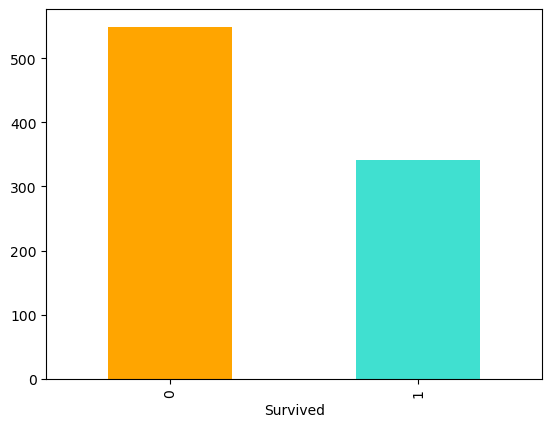

In [7]:
train_data["Survived"].value_counts().plot(kind="bar", color=["orange", "turquoise"]);

We see how we have an unbalanced problem here as values are not the same.

Let's find some statistical information regarding the other variables.

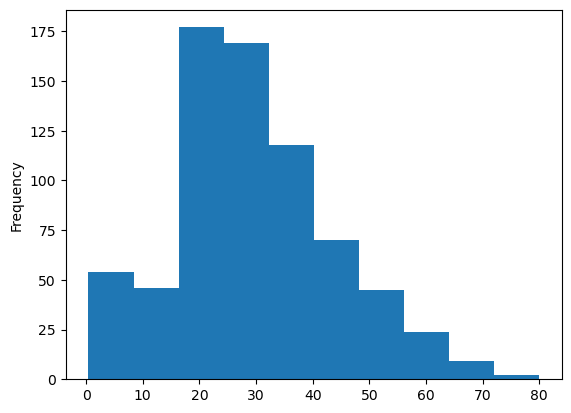

In [8]:
train_data["Age"].plot.hist();

In [9]:
train_data["Age"].median()

28.0

Let's see what is going on with Sex.

In [10]:
train_data.Sex.value_counts(), train_data.Sex.value_counts(normalize=True)

(Sex
 male      577
 female    314
 Name: count, dtype: int64,
 Sex
 male      0.647587
 female    0.352413
 Name: proportion, dtype: float64)

We can check how there is an almost 2:1 proportion between males and females.

In [11]:
# Compare survival column with sex column
pd.crosstab(train_data.Survived, train_data.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [12]:
train_data["Sex"][0], bool(train_data["Sex"][0])

('male', True)

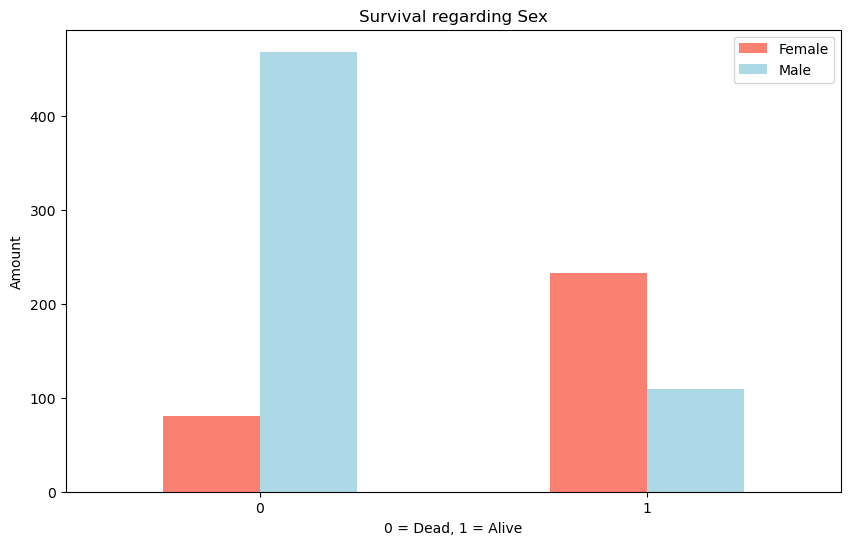

In [13]:
# Create a plot of crosstab
pd.crosstab(train_data.Survived, train_data.Sex).plot(kind="bar", 
                                                      figsize=(10, 6),
                                                      color=["salmon", "lightblue"])
plt.title("Survival regarding Sex")
plt.xlabel("0 = Dead, 1 = Alive")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);    # to rotate the 0 and 1 indexs of the xlabel

First we see how there is a clear 2:1 proportion of survival between female and male.

Also we can see how there were a lot more males that died than survived.

This could be related that females and childrens went first to the boats once they hit the iceberg.

Let's check the same but with passenger class.

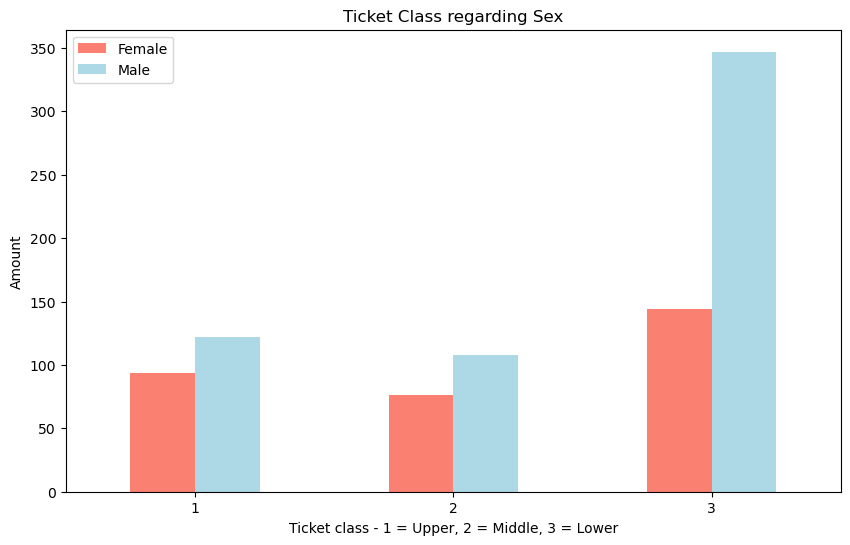

In [14]:
# Create a plot of crosstab
pd.crosstab(train_data.Pclass, train_data.Sex).plot(kind="bar", 
                                                      figsize=(10, 6),
                                                      color=["salmon", "lightblue"])
plt.title("Ticket Class regarding Sex")
plt.xlabel("Ticket class - 1 = Upper, 2 = Middle, 3 = Lower")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);    # to rotate the 0 and 1 indexs of the xlabel

We can clearly see how equally are tickets for upper and middle status, also they are quite balanced too.

But instead, for lower status there's a 2:1 proportion between male and female and a proportion 3:1 with the other classes.

<Axes: >

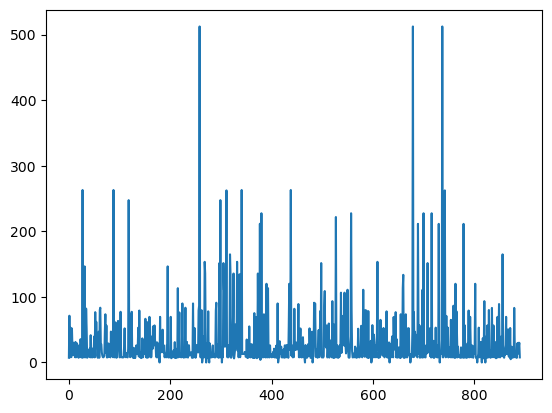

In [15]:
train_data["Fare"].plot()

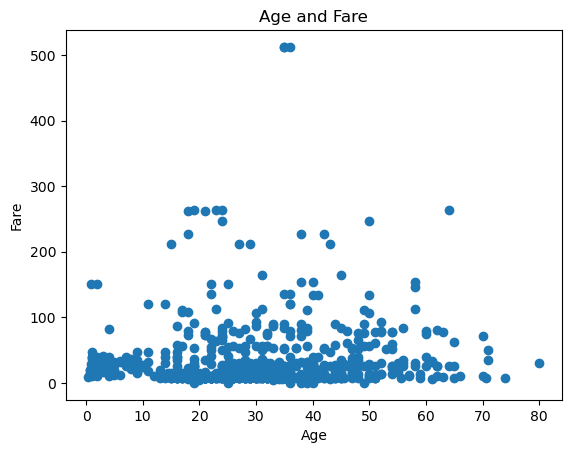

In [16]:
plt.scatter(train_data["Age"], train_data["Fare"])
plt.title("Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare");

Doesn't seem to be any correlation in this case.

### String conversion to categories

We need to transform all those values that are strings (objects) into numbers or categories to apply later ML algorithms.

In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
# Find the columns which contains strings
for label, content in train_data.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

Name
Sex
Ticket
Cabin
Embarked


In [20]:
# This will turn all string values into category values
for label, content in train_data.items():
    if pd.api.types.is_object_dtype(content):
        train_data[label] = content.astype("category").cat.as_ordered()   # assigns a numerical value to each category

In [21]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    category
 11  Embarked     889 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 122.0 KB


In [22]:
train_data.Name.cat.categories

Index(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem',
       ...
       'Yrois, Miss. Henriette ("Mrs Harbeck")', 'Zabour, Miss. Hileni',
       'Zabour, Miss. Thamine', 'Zimmerman, Mr. Leo',
       'de Messemaeker, Mrs. Guillaume Joseph (Emma)',
       'de Mulder, Mr. Theodore', 'de Pelsmaeker, Mr. Alfons',
       'del Carlo, Mr. Sebastiano', 'van Billiard, Mr. Austin Blyler',
       'van Melkebeke, Mr. Philemon'],
      dtype='object', length=891)

In [23]:
train_data.Name.cat.codes

0      108
1      190
2      353
3      272
4       15
      ... 
886    548
887    303
888    413
889     81
890    220
Length: 891, dtype: int16

### Fill missing values!

Now we have columns with numerical values and the rest with categorical values.

We need to check both of them and see if there are missing values and then look how to fill them.

In [24]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
# Check for which numeric columns have null values
for label, content in train_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Age


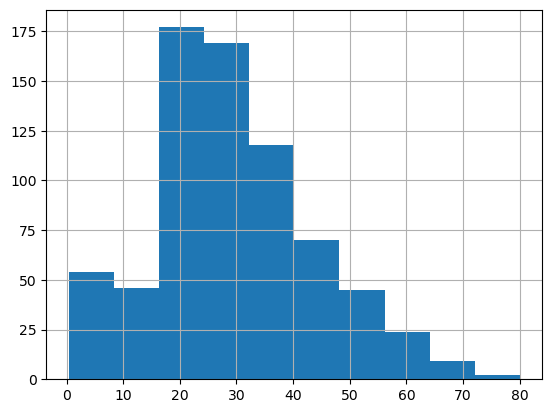

In [26]:
train_data.Age.hist();

In [27]:
train_data.Age.median()

28.0

We will fill our missing values with the median.

In [28]:
# Fill numeric rows with the median
for label, content in train_data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was originally missing or not to keep track in the dataset
            train_data[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            train_data[label] = content.fillna(content.median())

Next we have Cabin and Embarked, both categorical variables.

For embarked there are only 2 values missing, this will not affect at all our predictions, so we will leave the median value of the 3 ports.

In [29]:
# Turn categorical variables into numbers and fill missing
for label, content in train_data.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        train_data[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        train_data[label] = pd.Categorical(content).codes + 1

If there are missing values Pandas assigns them as -1, that's why we add +1 above as we don't want to have negative numbers.

That way when we turn categories into numbers those with 0 are missing values.

In [30]:
train_data.isna().sum()

PassengerId            0
Survived               0
Pclass                 0
Name                   0
Sex                    0
Age                    0
SibSp                  0
Parch                  0
Ticket                 0
Fare                   0
Cabin                  0
Embarked               0
Age_is_missing         0
Name_is_missing        0
Sex_is_missing         0
Ticket_is_missing      0
Cabin_is_missing       0
Embarked_is_missing    0
dtype: int64

We have our data ready to work!

Let's study some models and see which one performs better!

### Correlation Matrix

In [43]:
train_data[["PassengerId","Embarked"]]

,PassengerId,Embarked
0,1,3
1,2,1
2,3,3
3,4,3
4,5,3
...,...,...
886,887,3
887,888,3
888,889,3
889,890,1


(18.5, -0.5)

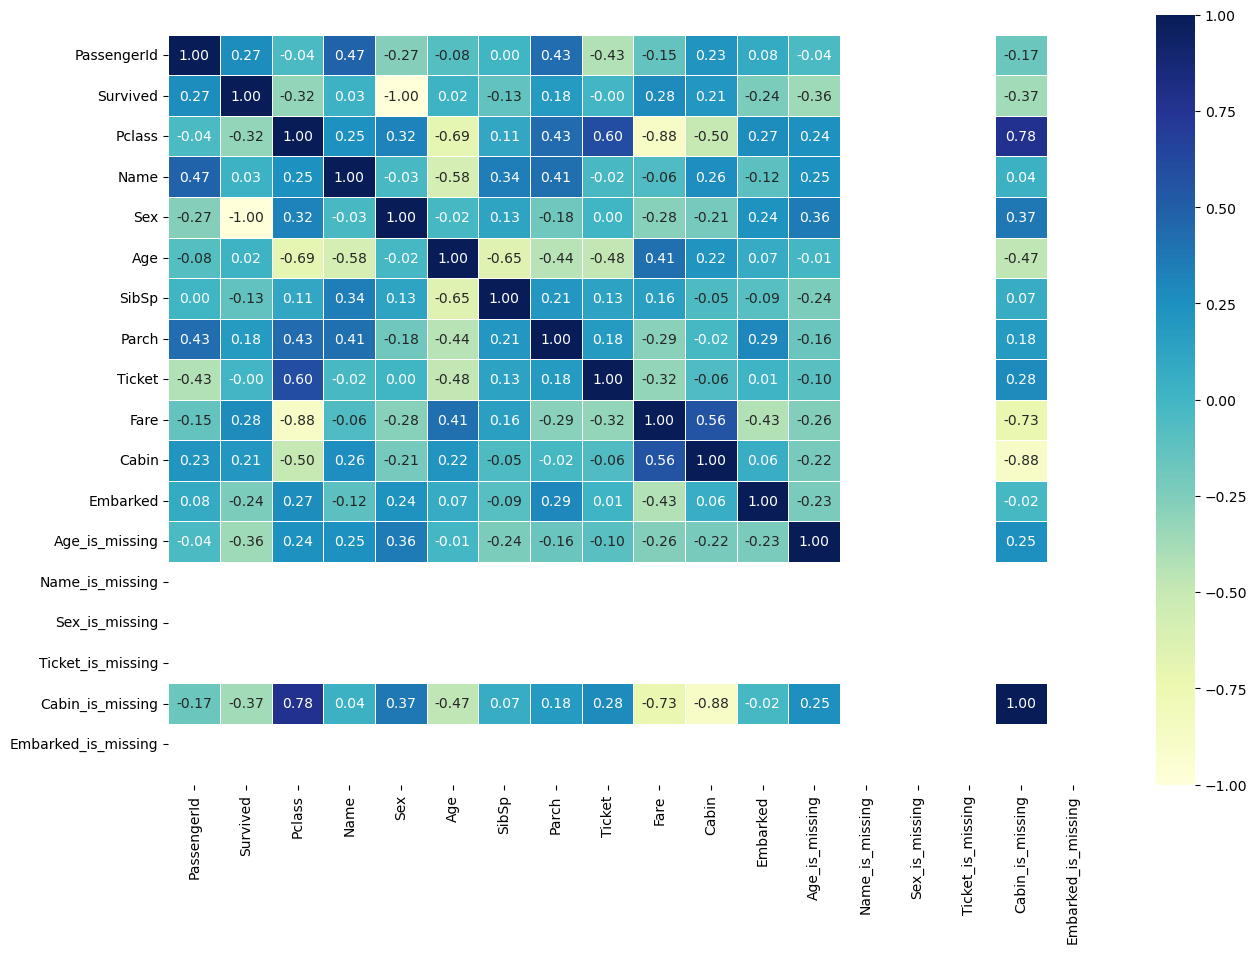

## Modelling

In [43]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_is_missing,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
0,1,0,3,109,2,22.0,1,0,524,7.2500,0,3,False,False,False,False,True,False
1,2,1,1,191,1,38.0,1,0,597,71.2833,82,1,False,False,False,False,False,False
2,3,1,3,354,1,26.0,0,0,670,7.9250,0,3,False,False,False,False,True,False
3,4,1,1,273,1,35.0,1,0,50,53.1000,56,3,False,False,False,False,False,False
4,5,0,3,16,2,35.0,0,0,473,8.0500,0,3,False,False,False,False,True,False


In [44]:
# Split data into X and y
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"]  # also done by doing: y = df.target.values

In [45]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

(18.5, -0.5)

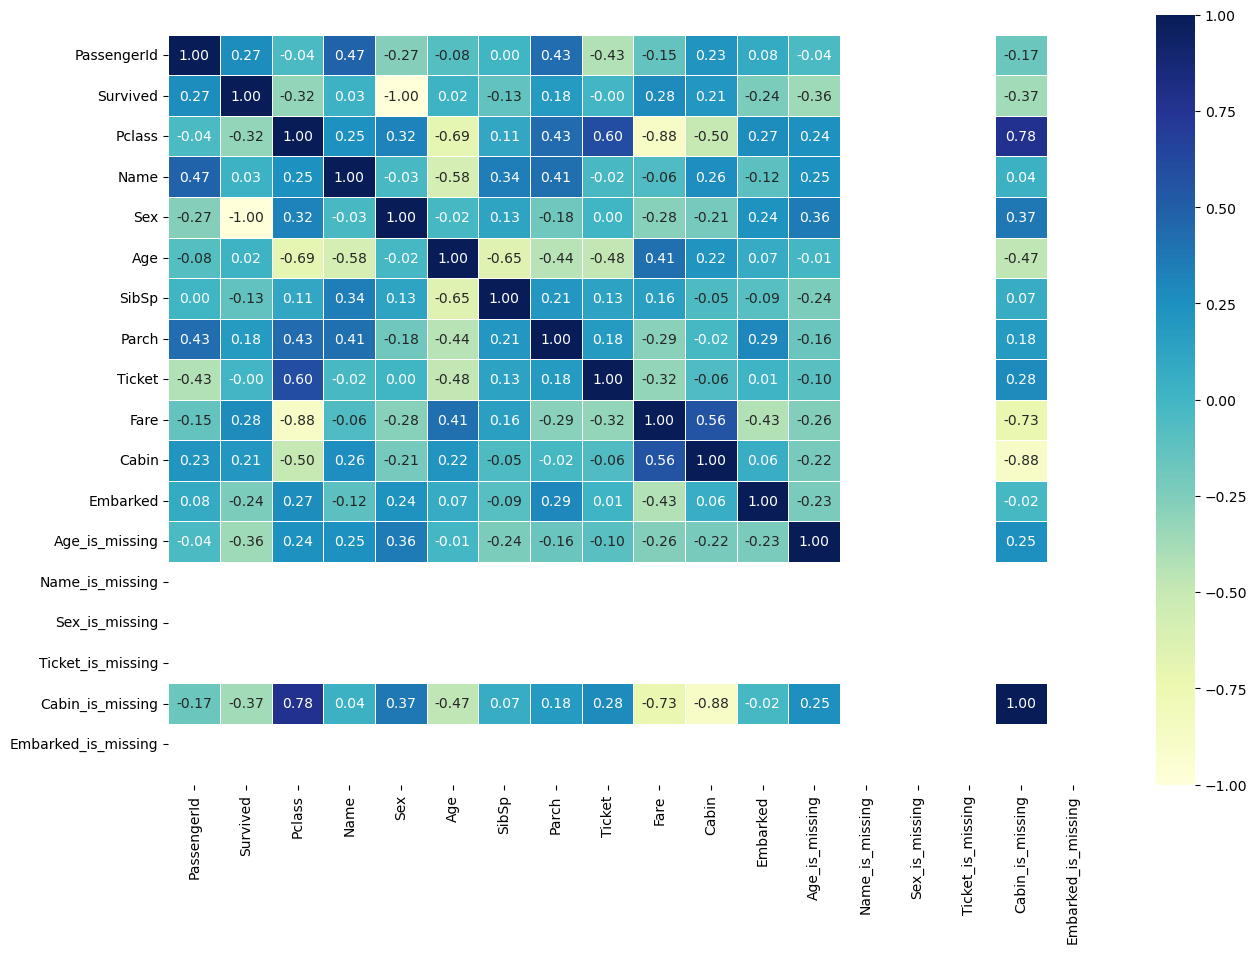